<a href="https://colab.research.google.com/github/himanshu6345/OasisInfobyte--Data-Science-Internship-/blob/main/Task1_iris_oas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Oasisinfobyte Data Science Internship**
 Task-1 : Iris Flower Classification
# by Himanshu kumar



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/Iris.csv")

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


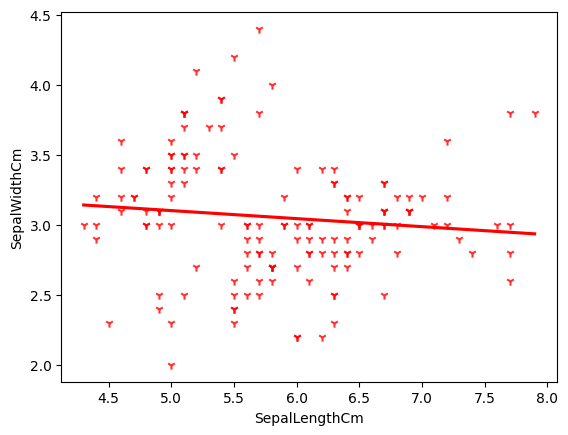

In [ ]:
sns.regplot(data=df, x=df['SepalLengthCm'],y=df['SepalWidthCm'],ci=None,marker="1",color="red")
plt.show()


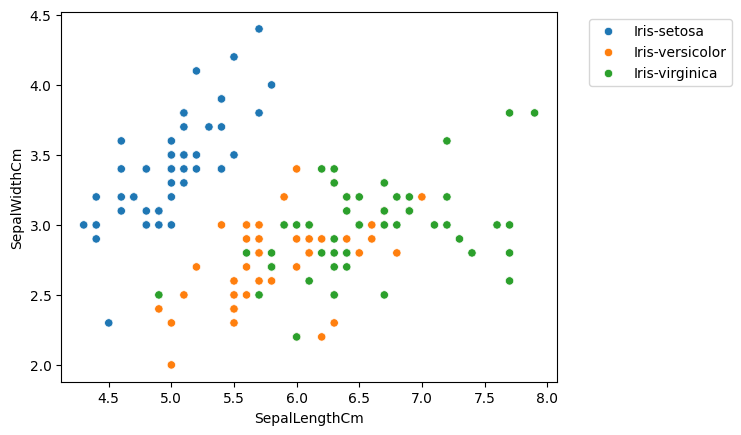

In [ ]:
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)


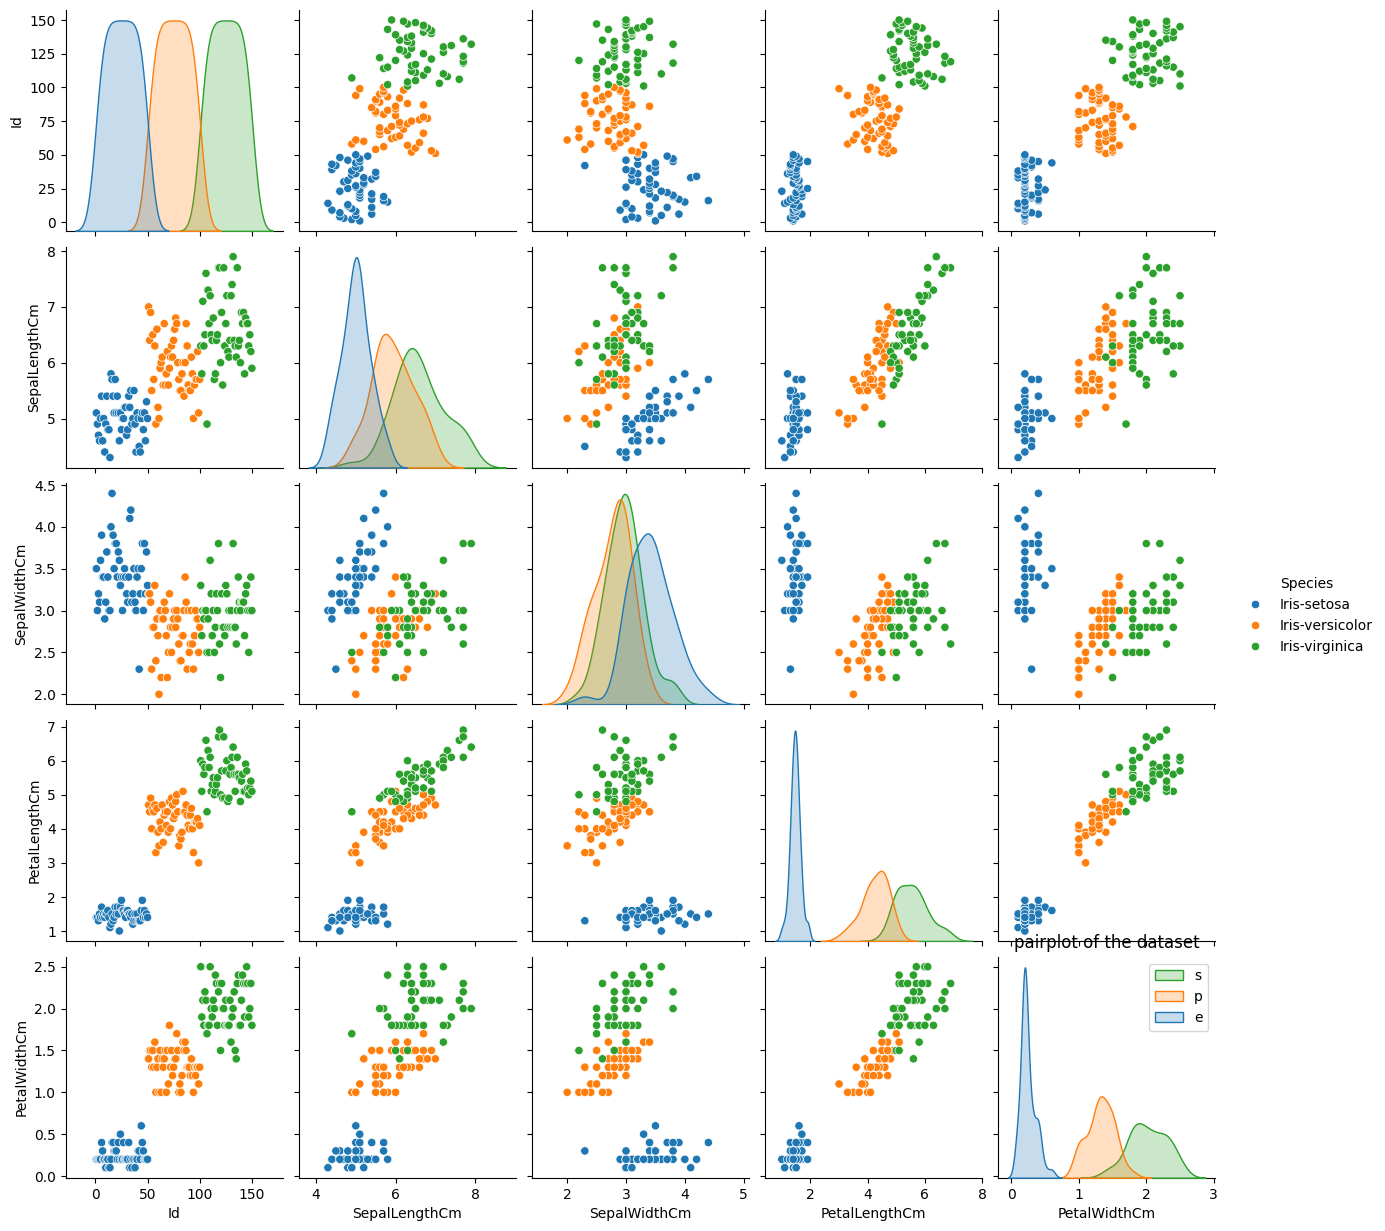

In [ ]:
sns.pairplot(df,hue="Species",diag_kind='kde')
plt.title("pairplot of the dataset")
plt.legend("species")

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
y= df[["Species"]]
x= df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [ ]:
#One hot Enncoding
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Step 4: Train test split
encoder = OneHotEncoder(sparse_output =False)
y = encoder.fit_transform(y)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2529)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [ ]:
# Model Creation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2721 - loss: 1.0924
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2965 - loss: 1.0564
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3452 - loss: 1.0386
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4321 - loss: 1.0195
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5331 - loss: 1.0003
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6167 - loss: 1.0122
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6533 - loss: 0.9905
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6502 - loss: 0.9678 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6554 - loss: 0.9862
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6527 - loss: 0.9736


In [ ]:
# predict
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


array([[0.54838574, 0.03687586, 0.41473848],
       [0.54017866, 0.02680861, 0.4330128 ],
       [0.5979867 , 0.01262938, 0.38938394],
       [0.32421988, 0.24447446, 0.43130562],
       [0.32798696, 0.34954542, 0.32246765],
       [0.32798696, 0.34954542, 0.32246765],
       [0.32798696, 0.34954542, 0.32246765],
       [0.32798696, 0.34954542, 0.32246765],
       [0.32527715, 0.3430331 , 0.33168966],
       [0.3432046 , 0.1550588 , 0.5017365 ],
       [0.33676082, 0.24418621, 0.41905296],
       [0.33472592, 0.26588193, 0.39939213],
       [0.3257444 , 0.3370085 , 0.3372471 ],
       [0.3326885 , 0.35493386, 0.3123775 ],
       [0.5075608 , 0.06303292, 0.4294062 ],
       [0.31554115, 0.1970474 , 0.48741156],
       [0.32630113, 0.32845157, 0.34524727],
       [0.32798696, 0.34954542, 0.32246765],
       [0.5625676 , 0.0244307 , 0.4130017 ],
       [0.49373507, 0.08077477, 0.42549005],
       [0.48717964, 0.08409188, 0.42872843],
       [0.49373507, 0.08077477, 0.42549005],
       [0.

In [ ]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
np.argmax(y_pred,axis=1)

array([0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 0])

In [ ]:
np.argmax(y_test,axis=1)

array([0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0])

In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

In [ ]:
#evaluate
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  2  3]
 [ 1  6  8]]


In [ ]:
y_test , y_pred

(array([0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0,
        2, 2, 1, 1, 0, 2, 2, 0]),
 array([0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0,
        2, 2, 2, 2, 0, 1, 0, 0]))